<a href="https://colab.research.google.com/github/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/01_Neural_Network_Regression_with_Tensorflow-2nd-learning_rate-adjustment-to-.01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Intro to neural network regression w/ tf
# predicting numbers as outcomes based on other numbers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

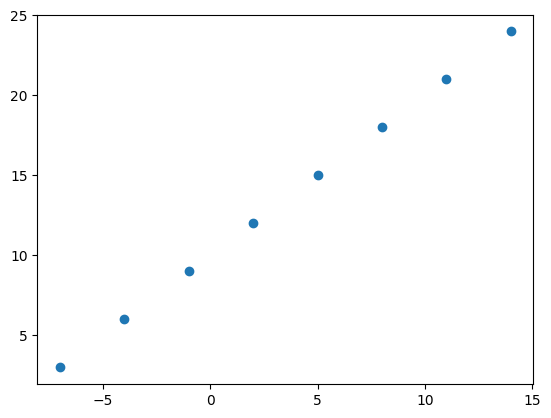

In [4]:
# create data to view and fit

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# creatwe labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(X, y);

In [5]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X + 10 # relationship trying to learn -- the function between - ind var

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
# input and output shapes
# create a demo tensor
house_info = tf.constant(["bedrooms", "bathrooms", "# of car(s) garage space"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=
 array([b'bedrooms', b'bathrooms', b'# of car(s) garage space'],
       dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
X[0],  y[0]

(-7.0, 3.0)

In [10]:
# major steps in modeling w/ tf -- turn np arrays into tensors w/ dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # returned a scalar

(TensorShape([]), TensorShape([]))

# **Steps for ML modeling**
1. **create a model:** define the input and output layers, also to include the hidden layers of a deep learning model.
2. **compile the model:** the function which tells our model how wrong it is, and the optimizer, which tells our model how to improve the patterns it learns. Evaluation metrics, used to interpret model performance
3. **fiting a model:** letting the model find patterns between X AND Y, aka features

# **Steps in TF:**
1. Get data ready -- convert to tensors
2. build or pick a model to suit problem
3. fit the model to the data and make a prediction
4. evaluate the model
5. save and reload the trained model

In [12]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # using one number to predict one number
])

#2. compile model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD stochastic gradient descent
              metrics=["mae"])

#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # 5 tries to figure out a pattern


Epoch 1/5
1/1 [==============================] - 1s 695ms/step - loss: 14.0933 - mae: 14.0933
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 13.9608 - mae: 13.9608
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.8283 - mae: 13.8283
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 13.6958 - mae: 13.6958
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 13.5633 - mae: 13.5633


In [13]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# try to predict using the model
model.predict([27]) # not very good -- we were expecting an approx. return of 10

1/1 [==============================] - 0s 142ms/step


array([[0.19813298]], dtype=float32)

# Improving the model
We can improve the model by altering/adjustiung the steps we used to create it.
1. create model -- add more layer, increase # of hidden units(neurons) within
each of the hidden layers - change activation function of each layer
2. compile model -- change optimization function -- learning rate hyper parameter of optimization function
3. fit model -- more epochs/rounds -- longer training time, or more examples to learn from

## lets create a larger model to see if we can improve our model and see if
## can predict the X + 10 fucntion pattern. Our first 5 epochs wasn't even close.


In [15]:
#1 create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # originally used SGD()
              # error was near 3 points - result was 29.87 -- Adam was very close!
              metrics=["mae"])
#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 646ms/step - loss: 20.3222 - mae: 20.3222
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 20.3162 - mae: 20.3162
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 20.3102 - mae: 20.3102
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 20.3042 - mae: 20.3042
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 20.2982 - mae: 20.2982
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 20.2922 - mae: 20.2922
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2862 - mae: 20.2862
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 20.2802 - mae: 20.2802
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2742 - mae: 20.2742
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2682 - mae: 20.2682
Epoch 11/100
1/1 [==============================] -

In [16]:
# show the data for a reminder
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [39]:
# LETS PREDICT! Did we improve?
model.predict([17.0]) # this has been run several times - not reflective of
# of original run w/ result of 27.136837

1/1 [==============================] - 0s 44ms/step


array([[21.208565]], dtype=float32)

In [40]:
## Very nice... much better! using Adam reduced the error to within .136837
# remember my 1st run with SGD() as optimizer was 2.87 in error!
# Let's try to add more in baby steps towards a larger model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # originally .0001
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 35.4549 - mae: 35.4549
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.0966 - mae: 25.0966
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 16.6343 - mae: 16.6343
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4464 - mae: 9.4464
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6566 - mae: 8.6566
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5675 - mae: 11.5675
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3835 - mae: 13.3835
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3161 - mae: 12.3161
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0039 - mae: 10.0039
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.0624 - mae: 8.0624
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

In [41]:
# now predict again and let's see...
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


array([[27.09747]], dtype=float32)

In [42]:
# not good -- adding the hidden layer made it worse, even with Adam --
# then used .1 as learning rate and got the above result...NICE! - .09747 error!

#Evaluating a model
### In practice, tytpical workflow is as follows when building neural networks:
### Build a model --> fit --> evaluate it --> tweak it --> fit it --> eval --
### tweak --> fit --> eval...
### Most important -- visualize, visualize visualize
### * the data -- what data are we working with?
### * training -- how does it perform while it learns?
### * predictions of the model -- do they line up against the ground truth (original labels)


In [43]:
# let's make a larger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [44]:
# make labels
y= X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

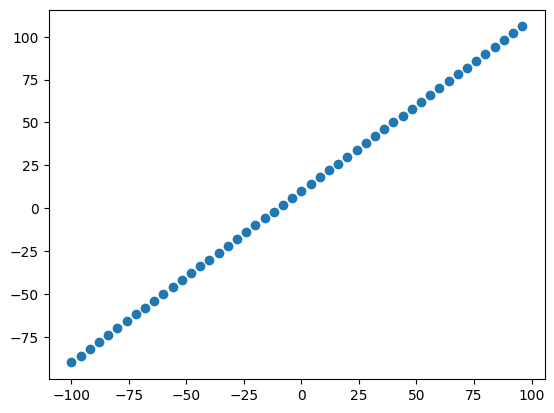

In [45]:
# visualize data
plt.scatter(X, y)

# **The three set theory/idea**
## * **Training set** -- data to learn from - typically 70-80% of total data in store
## * **Validation set** - the model gets tuned on this dataset -- typically 10-15% of data in store
## * **Test set** - evaluation againsty this set to test what has been learned, typically 10-15% of data in store   

In [46]:
# Check length of how many samples we have
len(X)

50

In [47]:
# spliot data into training and test set
X_train = X[:40] # first 40 traing samples = 80% of data
y_train = y[:40]
X_test = X[40:] # last 10 = 20% of data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

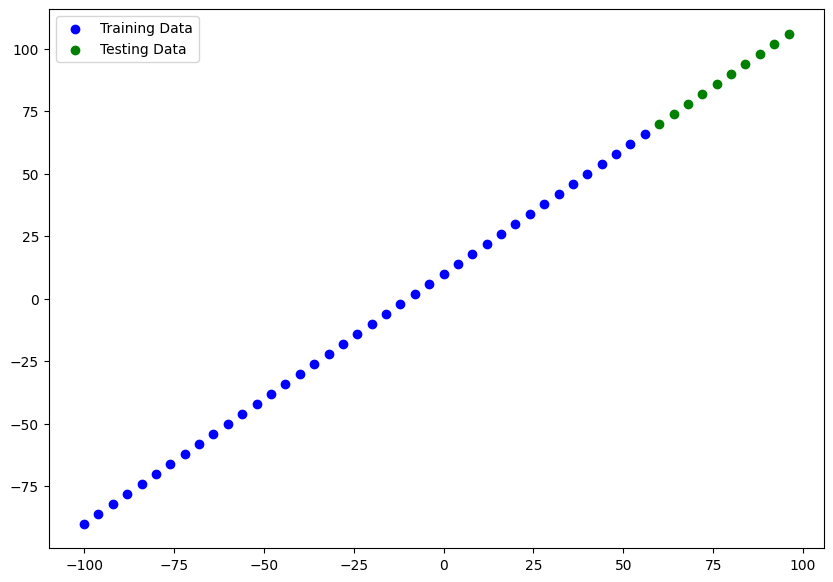

In [48]:
# Visualize training and test sets
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
#plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [49]:
# create new larger model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0018),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 38.0019 - mae: 38.0019
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.9744 - mae: 31.9744
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 26.6696 - mae: 26.6696
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 21.0237 - mae: 21.0237
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.8581 - mae: 14.8581
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.2198 - mae: 9.2198
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5432 - mae: 8.5432
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 6.2918 - mae: 6.2918
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 5.7653 - mae: 5.7653
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 7.1229 - mae: 7.1229
Epoch 11/100
2/2 [==============================] - 0s 10ms/step

In [56]:
model.predict([36])

1/1 [==============================] - 0s 38ms/step


array([[47.347652]], dtype=float32)

In [29]:
# pretty good! I adjusted the lr (learning_rate) from .0001 to what it is now
# I adjusted several times to end up with that learning_rate of .0018

In [57]:
X.shape

TensorShape([50])

In [77]:
# Build a model that auto builds by defining input_shape argument in the 1st layer
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # 10 = output
    # where 1 = input - see plot_model image below
    tf.keras.layers.Dense(1, name="output_layer")
], name="Sample_1")

# good to name your layers and models for better organization

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 56.6002 - mae: 56.6002
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 49.4128 - mae: 49.4128
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 42.5547 - mae: 42.5547
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 35.5097 - mae: 35.5097
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 28.6694 - mae: 28.6694
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 21.8442 - mae: 21.8442
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 15.2188 - mae: 15.2188
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9461 - mae: 8.9461
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0344 - mae: 9.0344
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6605 - mae: 11.6605
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

In [78]:
model.summary() # verify against plot_model resultant image below

Model: "Sample_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Total params** = total # of parameters in model
## **Trainable parameters** = patterns model can update as it trains
## **Non-trainable params** = not updated during training -- imported models during transfer learning

In [79]:
# visualizing a model's layers
from tensorflow.keras.utils import plot_model

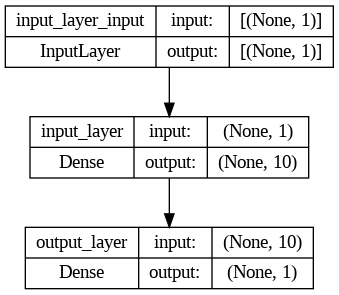

In [80]:
plot_model(model=model, show_shapes=True)

In [81]:
# Vizualizing our model's predictions

In [82]:
#to viz predictions -- plot against ground truth layers
# i.e form of 'y_test' or 'y_true' vs 'y_preds'

# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 69.94082],
       [ 73.91625],
       [ 77.89168],
       [ 81.86712],
       [ 85.84254],
       [ 89.81798],
       [ 93.7934 ],
       [ 97.76884],
       [101.74427],
       [105.7197 ]], dtype=float32)

In [83]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [84]:
# viz by plot if you are going to reuse functionality - good idea to create
# a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions top ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # add extra dataset - plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show a legend
  plt.legend();

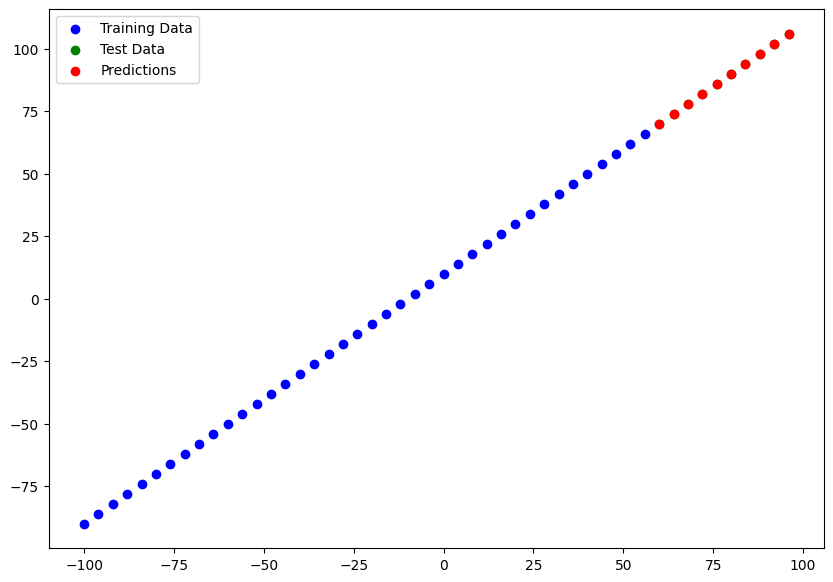

In [85]:
plot_predictions()

In [86]:
#ON THE MONEY THIS TIME! I adjusted the Adam optimizer learning_rate to .01 from
# .001